# Merging Tables to Have Comprehensive Plots

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Analyzing Monthly Job Postings for Top Data Jobs in the US

<function matplotlib.pyplot.show(close=None, block=None)>

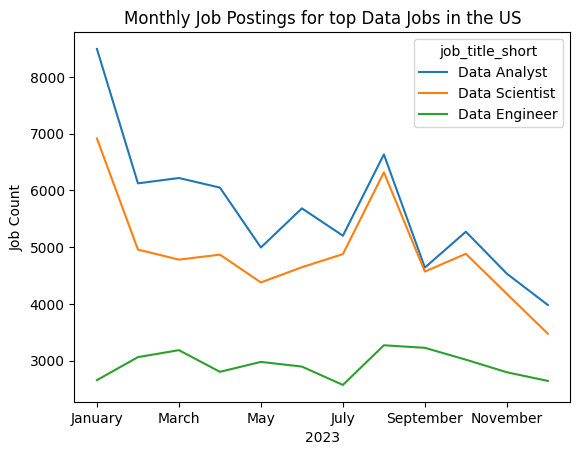

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter jobs posted in the United States and create a copy
df_US = df[df['job_country'] == 'United States'].copy()

# Extract the full month name from the job posting date
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

# Create a pivot table with months as rows and job titles as columns, counting occurrences
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

# Reset index to make month names a column
df_US_pivot.reset_index(inplace=True)

# Convert month names to numerical values for sorting
df_US_pivot['job_month'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

# Sort data by month number to ensure chronological order
df_US_pivot.sort_values(by='job_month', inplace=True)

# Set the index back to job_posted_month (month names)
df_US_pivot.set_index('job_posted_month', inplace=True)

# Remove the temporary numerical month column
df_US_pivot.drop(columns='job_month', inplace=True)

# Identify the top 3 most frequent job titles in the dataset
data_jobs = df_US['job_title_short'].value_counts().head(3).index.tolist()

# Filter the pivot table to include only the top 3 job titles
df_US_pivot = df_US_pivot[data_jobs]

# Plot the data as a line chart
df_US_pivot.plot(kind='line')

# Add title and labels
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


## Merging US Job Postings Data with Software Usage Data


In [ ]:
import pandas as pd

# Load software usage data from the provided CSV URL, using 'job_posted_month' as the index
df_US_software = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

# Merge job postings pivot table with software usage data on the 'job_posted_month' index
df_US_merged = df_US_pivot.merge(df_US_software, on='job_posted_month')

# Display the merged DataFrame
df_US_merged



,Data Analyst,Data Scientist,Data Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,
January,8494,6915,2655,13619,9827,5108,4348
February,6124,4956,3060,11456,9116,7298,4284
March,6218,4779,3183,11102,8178,5814,4159
April,6049,4867,2801,14037,9209,7232,4220
May,4993,4377,2976,12126,8864,6718,4980
June,5683,4645,2893,12003,8065,5902,4781
July,5201,4876,2570,11914,8061,6839,4344
August,6634,6318,3269,11571,8191,7413,4104
September,4639,4568,3224,14016,8447,6139,4094


## Identifying the Top 5 Most Common Job Titles

### Sum all values in the merged dataset, sort in descending order, and select the top 5

In [ ]:
top_5 = (df_US_merged
         .sum()  # Compute the total count for each column
         .sort_values(ascending=False)  # Sort values in descending order
         .head()  # Select the top 5 entries
         .index  # Extract the column names (job titles/software)
         .to_list())  # Convert to a list

top_5


['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

## Visualizing Monthly Job Postings for Top Tech Jobs in the US

<function matplotlib.pyplot.show(close=None, block=None)>

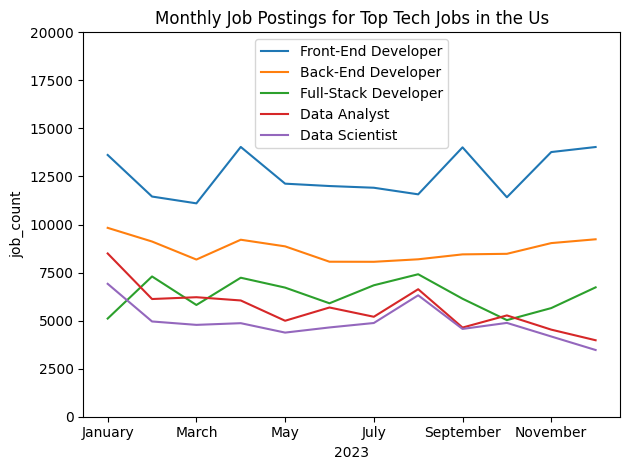

In [ ]:
import matplotlib.pyplot as plt

# Plot the trend of the top 5 job postings over time
df_US_merged[top_5].plot(kind='line')

# Add title and labels
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')  # X-axis represents months in 2023
plt.ylabel('Job Count')

# Set y-axis limit to improve readability
plt.ylim(0, 20000)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()
